In [5]:
# 参考：https://nw.tsuda.ac.jp/lec/BellmanFord/
from IPython.display import Image, display_png

In [14]:
class BellmanFord():
    """ベルマンフォード法で最短経路を求める"""
    def __init__(self, s, V):
        """
        Args:
            s(int): 始点
            V(int): 頂点数
        """
        self.graph = {}
        for i in range(V):
            self.graph[i] = []
        self._V = V
        self.dst = [float("inf") for _ in range(V)]
        self.dst[s] = 0

    @property
    def dist(self):
        return self.dst

    @property
    def V(self):
        return self._V

    def add(self, a, b, cost):
        """頂点aから頂点bへのコストはcost"""
        self.graph[a].append((b, cost))

    def shortest_path(self):
        """始点sからの最短経路を求める
        Returns:
            (bool): 負の閉路が存在する(True) / 存在しない(False)
        """
        for t in range(self.V):
            update = False
            for u in range(self.V):
                if self.dst[u] == float("inf"): continue
                for v, cost in self.graph[u]:
                    self.dst[v]
                    if self.dst[v] > self.dst[u] + cost:
                        self.dst[v] = self.dst[u] + cost
                        update = True

                        if t == self.V-1:
                            return True

            if not update:
                break

        return False


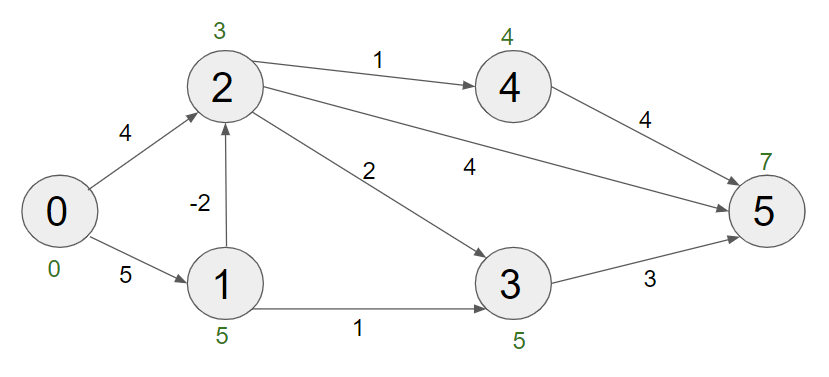

In [15]:
# 例1：負の閉路が存在しない場合
display_png(Image("img/bellmanford1.PNG"))

In [16]:
V = 6
bf = BellmanFord(0, V)
bf.add(0, 1, 5)
bf.add(0, 2, 4)
bf.add(1, 2, -2)
bf.add(1, 3, 1)
bf.add(2, 3, 2)
bf.add(2, 4, 1)
bf.add(2, 5, 4)
bf.add(3, 5, 3)
bf.add(4, 5, 4)
nloop = bf.shortest_path()

print("負の閉路は存在するか？: ", nloop)
print("頂点5までの最短コスト: ", bf.dist[5])

負の閉路は存在するか？:  False
頂点5までの最短コスト:  7


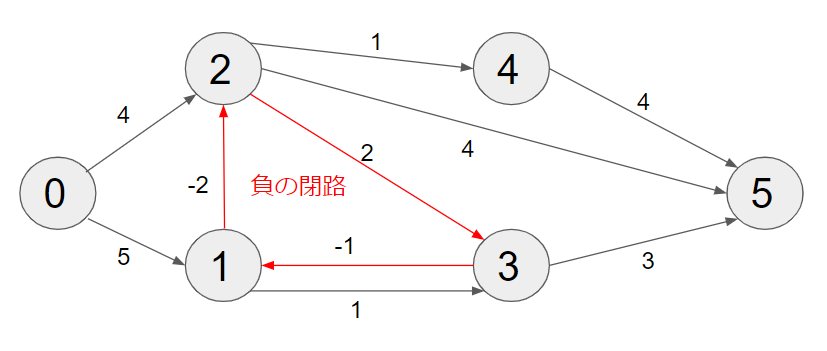

In [18]:
# 例2：負の閉路が存在して、頂点5までの最短コストは求まらない場合
display_png(Image("img/bellmanford2.PNG"))

In [19]:
V = 6
bf = BellmanFord(0, V)
bf.add(0, 1, 5)
bf.add(0, 2, 4)
bf.add(1, 2, -2)
bf.add(1, 3, 1)
bf.add(2, 3, 2)
bf.add(2, 4, 1)
bf.add(2, 5, 4)
bf.add(3, 1, -1)
bf.add(3, 5, 3)
bf.add(4, 5, 4)
nloop = bf.shortest_path()

print("負の閉路は存在するか？: ", nloop)
print("頂点5までの最短コスト: ", bf.dist[5])  # 負の閉路が存在して最短コストは求まらない

負の閉路は存在するか？:  True
頂点5までの最短コスト:  3


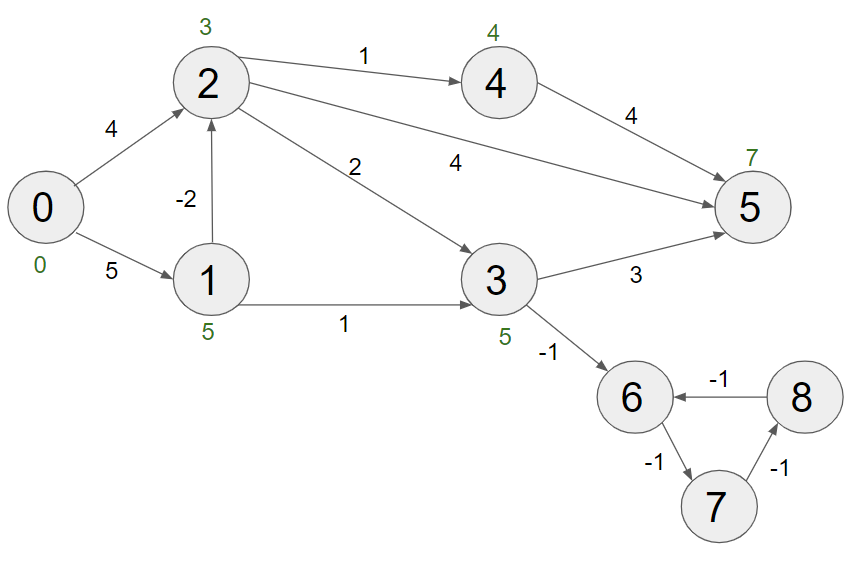

In [20]:
# 例3：負の閉路が存在するが、頂点5までの最短コストは求まる場合
display_png(Image("img/bellmanford3.PNG"))

In [21]:
V = 9
bf = BellmanFord(0, V)
bf.add(0, 1, 5)
bf.add(0, 2, 4)
bf.add(1, 2, -2)
bf.add(1, 3, 1)
bf.add(2, 3, 2)
bf.add(2, 4, 1)
bf.add(2, 5, 4)
bf.add(3, 5, 3)
bf.add(3, 6, -1)
bf.add(4, 5, 4)
bf.add(6, 7, -1)
bf.add(7, 8, -1)
bf.add(8, 6, -1)
nloop = bf.shortest_path()

print("負の閉路は存在するか？: ", nloop)
print("頂点5までの最短コスト: ", bf.dist[5])  # 負の閉路が存在するのですべての頂点について最短経路は求まらないが、頂点5の最短距離は求まる

負の閉路は存在するか？:  True
頂点5までの最短コスト:  7
